<a href="https://colab.research.google.com/github/fmakkawi/Data201/blob/main/DATA_201_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =====================================
# DATA 105 Final Project
# Name: Farah Makkawi
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the uploaded file
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
df.head()


Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv
Loaded file: Electric_Vehicle_Population_Data.csv
Dataset shape: (264628, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,0.0,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204.0,0.0,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [2]:
# Keep only the columns we need
cols = ["Model Year", "Make", "Electric Vehicle Type", "Electric Range", "Base MSRP"]
df_clean = df[cols].copy()

# Remove missing values
df_clean = df_clean.dropna()

print("After cleaning:", df_clean.shape)
df_clean.head()


After cleaning: (264624, 5)


,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP
0,2024,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),23.0,0.0
1,2018,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),16.0,0.0
2,2015,NISSAN,Battery Electric Vehicle (BEV),84.0,0.0
3,2019,AUDI,Battery Electric Vehicle (BEV),204.0,0.0
4,2022,TESLA,Battery Electric Vehicle (BEV),0.0,0.0


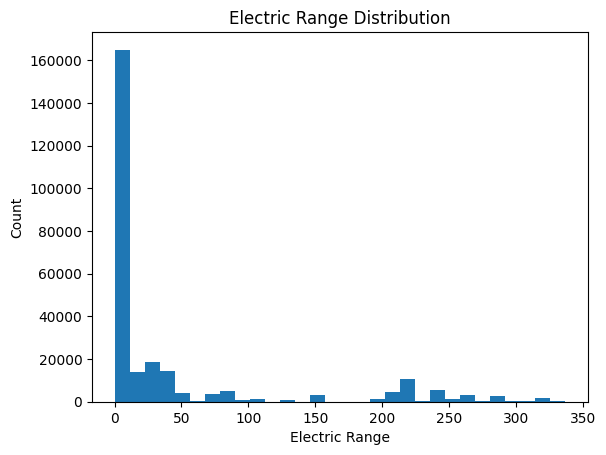

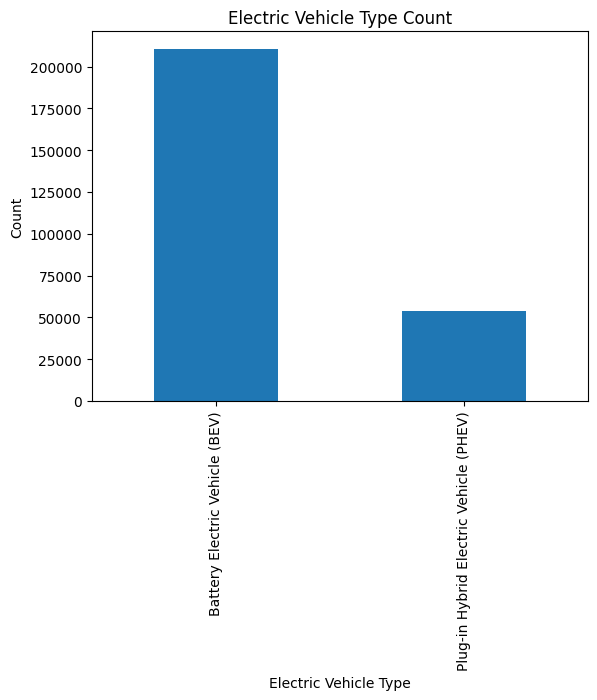

In [3]:
# Histogram of Electric Range
plt.figure()
plt.hist(df_clean["Electric Range"], bins=30)
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range")
plt.ylabel("Count")
plt.show()

# Bar chart for EV Type
plt.figure()
df_clean["Electric Vehicle Type"].value_counts().plot(kind="bar")
plt.title("Electric Vehicle Type Count")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode Make (feature)
make_encoder = LabelEncoder()
df_clean["Make_num"] = make_encoder.fit_transform(df_clean["Make"])

# Encode EV Type (target)
type_encoder = LabelEncoder()
df_clean["EVType_num"] = type_encoder.fit_transform(df_clean["Electric Vehicle Type"])

df_clean.head()


,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Make_num,EVType_num
0,2024,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),23.0,0.0,2,1
1,2018,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),16.0,0.0,2,1
2,2015,NISSAN,Battery Electric Vehicle (BEV),84.0,0.0,31,0
3,2019,AUDI,Battery Electric Vehicle (BEV),204.0,0.0,2,0
4,2022,TESLA,Battery Electric Vehicle (BEV),0.0,0.0,39,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Features (inputs)
X = df_clean[["Model Year", "Make_num", "Electric Range", "Base MSRP"]]

# Target (what we predict)
y = df_clean["EVType_num"]

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9994520547945206


In [6]:
# Predict probabilities for each class
probs = model.predict_proba(X_test)

# Show first 5 rows
probs[:5]


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=type_encoder.classes_))


                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00     42193
Plug-in Hybrid Electric Vehicle (PHEV)       1.00      1.00      1.00     10732

                              accuracy                           1.00     52925
                             macro avg       1.00      1.00      1.00     52925
                          weighted avg       1.00      1.00      1.00     52925



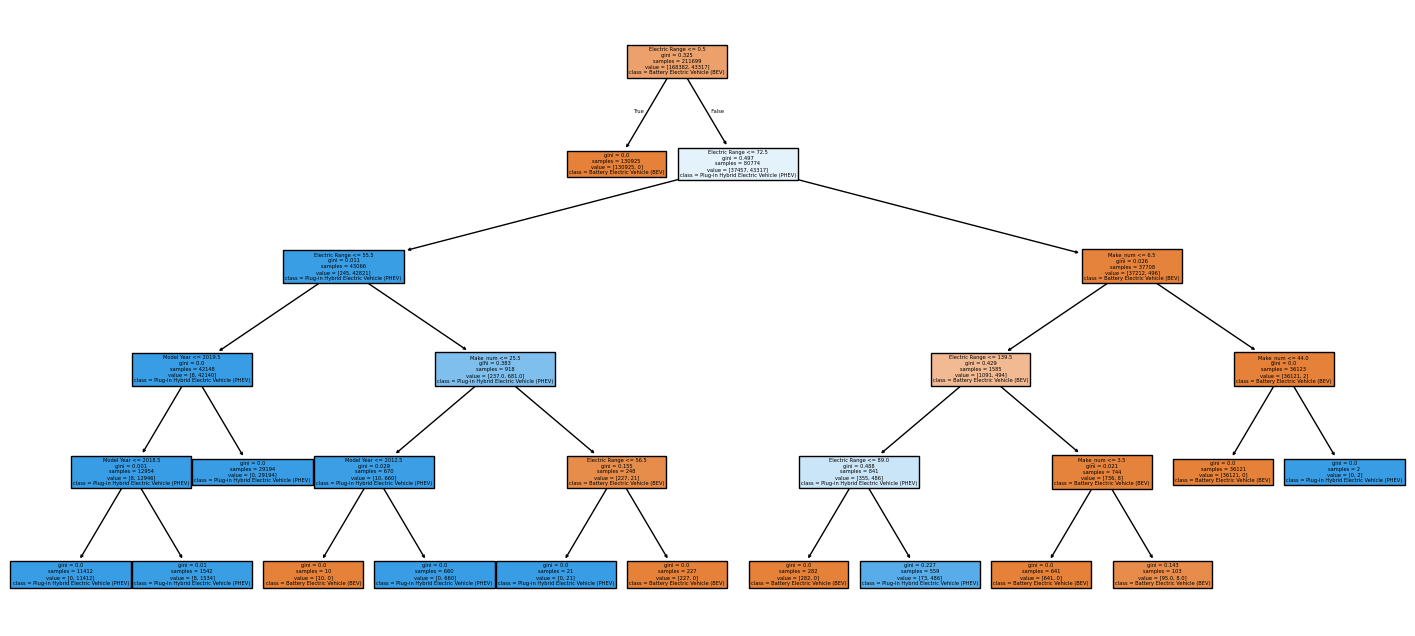

In [9]:
from sklearn import tree

plt.figure(figsize=(18, 8))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=type_encoder.classes_,
    filled=True
)
plt.show()
